In [40]:
%load_ext autoreload
%autoreload 2

import arrival_process_simulation as arrival
import numpy as np
import matplotlib.pyplot as plt
import stochastic_plots as stoch
from scipy.stats import expon
from scipy.special import factorial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Por comodidad utilizaremos la notación $P_n = \mathbb P [N(t) = n]; \quad P_{\Delta n} = \mathbb P [\Delta N(t) = n]$.
$$\begin{aligned}
\mathbb{P}[N(t+\Delta t) = n] &= \sum_{i=0}^n P_{n-i} P_{\Delta i}\\
 &= P_n P_{\Delta 0} + P_{n-1}P_{\Delta 1} + \sum_{i=2}^{n}P_{n-i} P_{\Delta i} \\
 &= P_n - P_n\lambda\Delta t +P_{n-1}\lambda\Delta t +\sum_{i=2}^{n}P_{n-i} P_{\Delta i}+ o(\Delta t)
\end{aligned}$$

Observemos que para $i\geq 2$ se cumple $0 \leq P_{\Delta i} \leq o(\Delta t)$ por (3).

Por tanto, si $\Delta t \rightarrow 0^+$ cada sumando tenderá a $0$ por el teorema del Sandwich. Aplicando este límite, obtenemos la siguiente EDO.

$$
\frac{d}{dt}P_n = -\lambda P_n + \lambda P_{n-1}
$$

Como sugiere el enunciado, podemos comprobar que $f_n(t) = \frac{1}{n!} \lambda^n t^n e^{-\lambda t}$ es solución de la EDO. Para ello, debemos comprobar su derivada respecto a $t$ y la condición inicial.

$$\begin{aligned}
\frac{d}{dt} fn(t) &= \frac{1}{(n-1)!} \lambda^n t^{n-1} e^{-\lambda t} - \frac{1}{n!} \lambda^{n+1} t^n e^{-\lambda t} \\
&= \lambda \left(\frac{1}{(n-1)!} \lambda^{n-1} t^{n-1} e^{-\lambda t} - \frac{1}{n!} \lambda^n t^n e^{-\lambda t}\right) \\
&= \lambda\left( P_{n-1} - P_n \right) \\
\\
f_0(0) &= 1
\end{aligned}$$








De no haber tenido un candidato para comprobar que cumple la EDO podríamos haberla solucionado de la siguiente manera.

Utilizando el factor integrante $e^{\lambda t}$ redefinimos el problema como:

$$\begin{aligned}
e^{\lambda t}\frac{d}{dt}P_n  &= -\lambda P_n e^{\lambda t}+ \lambda P_{n-1}e^{\lambda t}\\
\frac{d}{dt}\left[P_n e^{\lambda t}\right] &= \lambda P_{n-1}e^{\lambda t}
\end{aligned}$$

Para $n=0$ tenemos:

$$\frac{d}{dt}\left[P_0 e^{\lambda t}\right] = \frac{d}{dt}\left[e^{-\lambda t} e^{\lambda t}\right] = 0$$

Para $n=1$ tenemos:

$$\begin{aligned}
\frac{d}{dt}\left[P_1 e^{\lambda t}\right] &= \lambda P_0e^{\lambda t} = \lambda\\
P_1 e^{\lambda t} &= \int_0^t\lambda d\tau = \lambda t
\end{aligned}
$$

Para $n=2$ tenemos:

$$P_2 e^{\lambda t} = \int_0^t \lambda^2\tau d\tau = \frac{1}{2}\lambda^2t^2$$

Por inducción sobre $n$ podemos llegar a la solución general:

$$\begin{aligned}
P_n e^{\lambda t} &= \frac{1}{n!}\lambda^nt^n \\
P_n  &= \frac{1}{n!}\lambda^nt^n e^{-\lambda t}
\end{aligned}
$$

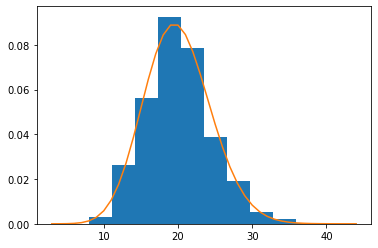

In [83]:
# Parameters of the Poisson process
lambda_rate = 10
t0 = 0.0
t1 = 2.0
M = 1000 # Number of simulations

# Run M simulations of the Poisson process
arrival_times = arrival.simulate_poisson(t0, t1, lambda_rate, M)

# Get number of events in each simulation
Ns = np.array([len(a) for a in arrival_times])

# Theoretical probability
X = np.array(range(Ns.min()-5, Ns.max()+5+1))
theoretical = np.exp(-lambda_rate*t1) * (t1*lambda_rate)**X / factorial(X)

# Plot
plt.hist(Ns, density=True)
plt.plot(X, theoretical)
plt.show()